In [ ]:
from google.colab import drive
drive.mount("/content/drive")

!ls /content/drive/MyDrive/Colab\ Notebooks/Automobile.csv
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/MyDrive/Colab Notebooks/Automobile.csv'
/content


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Automobile.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df = df.drop(columns = ['name','origin'])
df.info()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year

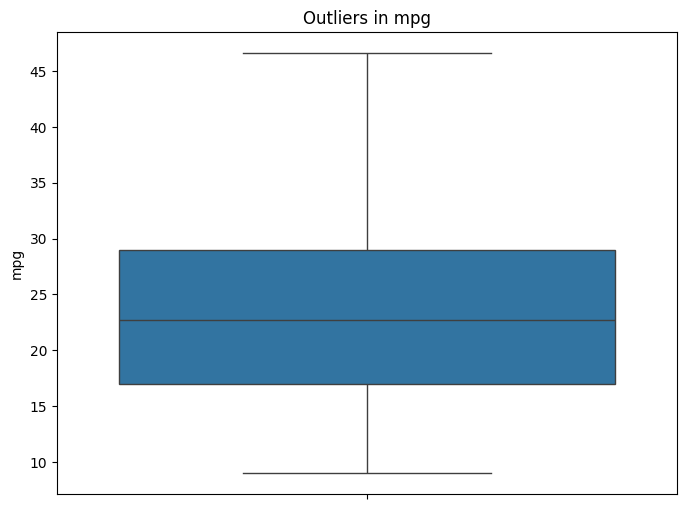

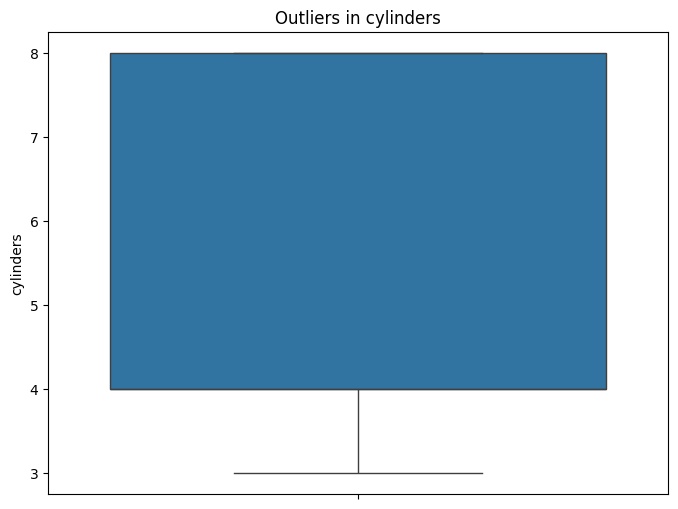

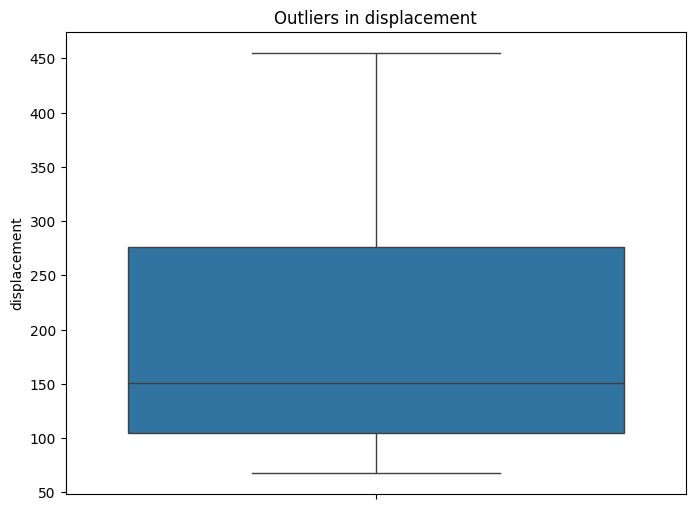

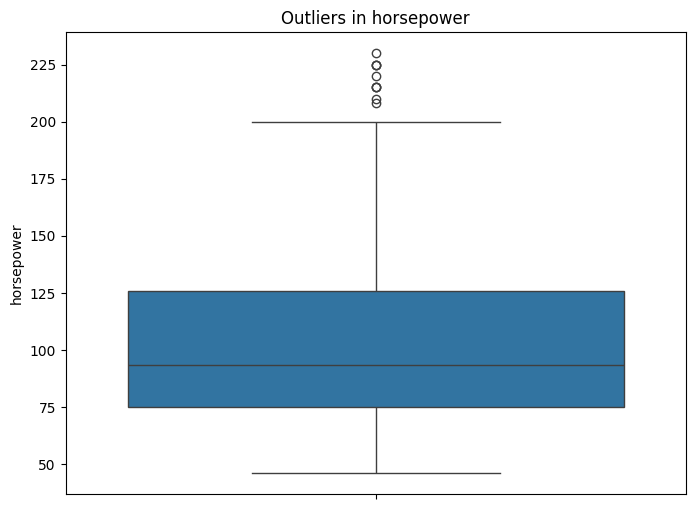

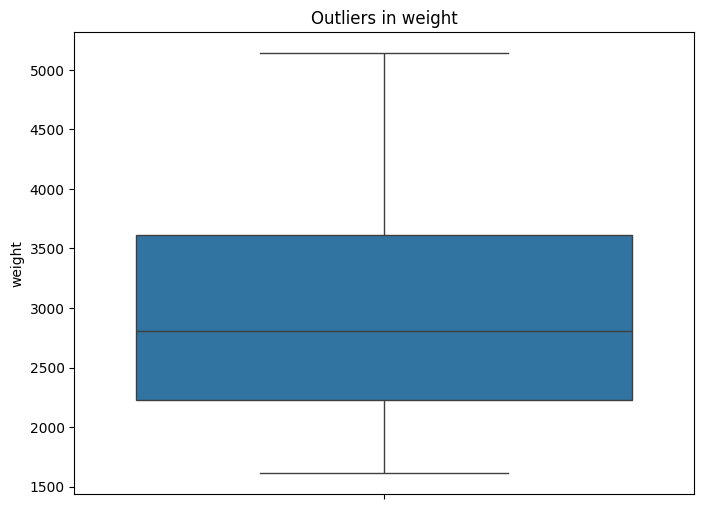

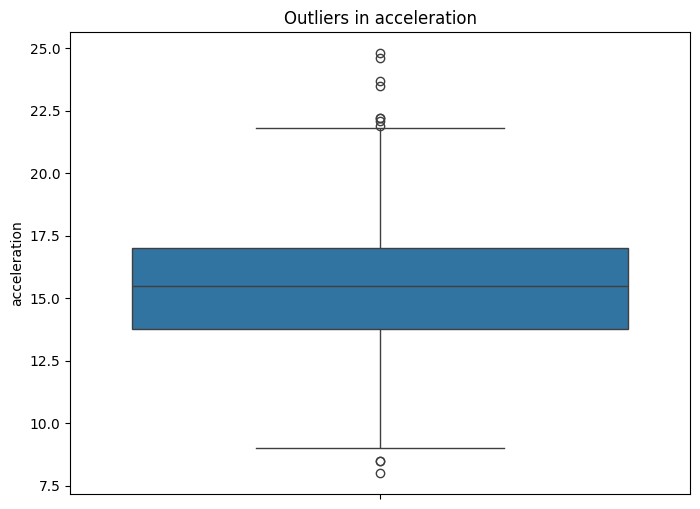

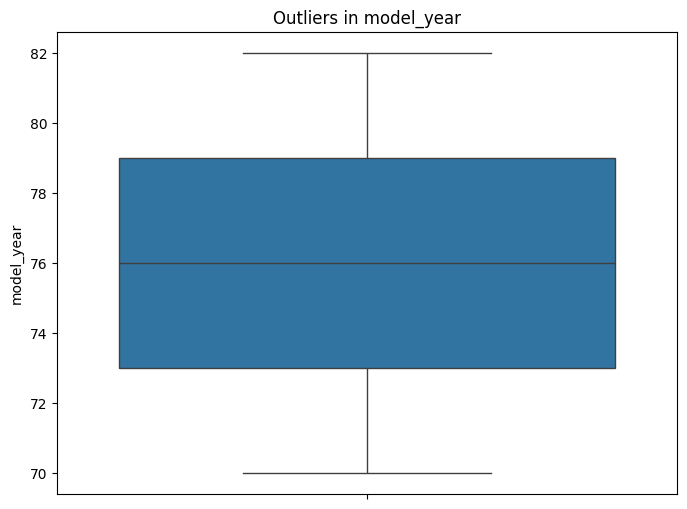

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

for i in columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[i])
        plt.title(f'Outliers in {i}')
        plt.show()

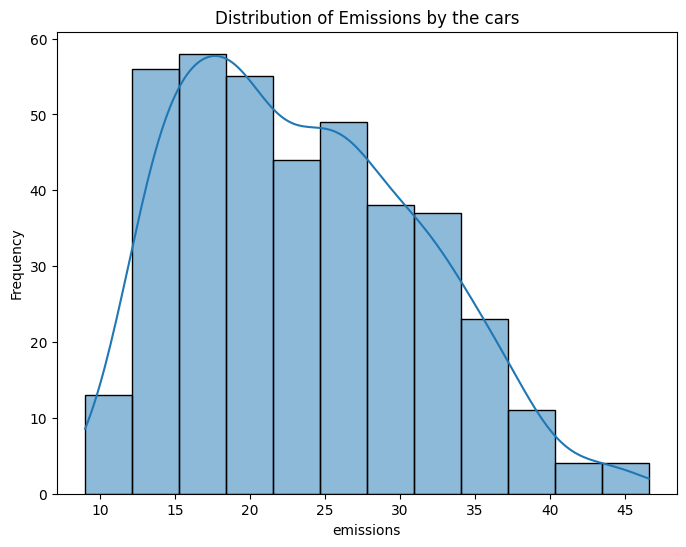

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['mpg'].dropna(), kde=True)
plt.title("Distribution of Emissions by the cars")
plt.xlabel("emissions")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_standardized = scaler.fit_transform(df)

df= pd.DataFrame(df_standardized, columns=df.columns)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X = df.drop(columns=['mpg'])
y = df['mpg']
results = {
    'Regression Tree': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Ridge Regression': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Lasso Regression': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Principal Component Regression (PCR)': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Regression Splines': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Support Vector Regression': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []}
}
num_features = X.shape[1]

for _ in range(20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)


    models = {
        'Regression Tree': DecisionTreeRegressor(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Principal Component Regression (PCR)': make_pipeline(StandardScaler(), PCA(n_components=num_features), LinearRegression()),
        'Regression Splines': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Support Vector Regression': SVR()
    }

    for model_name, model in models.items():


        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rss = np.sum((y_test - y_pred) ** 2)
        rse = np.sqrt(rss / (len(y_test) - X_test.shape[1] - 1))
        r2 = r2_score(y_test, y_pred)


        results[model_name]['Test MSE'].append(mse)
        results[model_name]['Test RMSE'].append(rmse)
        results[model_name]['Test RSE'].append(rse)
        results[model_name]['Test RSS'].append(rss)
        results[model_name]['Test R^2'].append(r2)

average_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()} for model, metrics in results.items()}
results_df = pd.DataFrame(average_results)
results_df


,Regression Tree,Ridge Regression,Lasso Regression,Principal Component Regression (PCR),Regression Splines,Support Vector Regression
Test MSE,0.233137,0.193935,1.000430,0.194215,0.462382,0.122324
Test RMSE,0.481140,0.439739,0.999830,0.440032,0.598641,0.348397
Test RSE,0.496079,0.453393,1.030874,0.453695,0.617229,0.359214
Test RSS,27.510166,22.884331,118.050696,22.917415,54.561124,14.434203
Test R^2,0.763125,0.803637,-0.013035,0.803335,0.531989,0.876363


Running GridSearchCV for Ridge Regression...
Ridge Regression - Best Parameters: {'ridge__alpha': 1}
Ridge Regression - Metrics: {'MSE': 0.16836090342563662, 'RMSE': 0.4103180515473778, 'RSE': 0.42305822022000916, 'RSS': 19.86658660422512, 'R²': 0.8066325970745019}



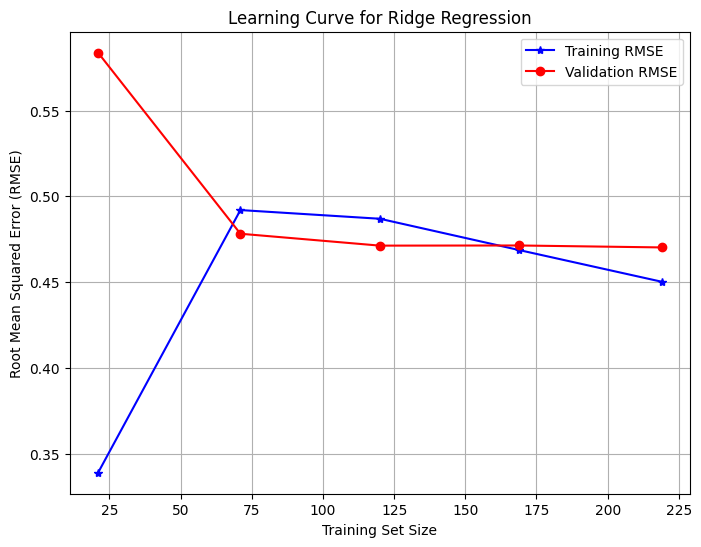

Running GridSearchCV for Lasso Regression...
Lasso Regression - Best Parameters: {'lasso__alpha': 0.01}
Lasso Regression - Metrics: {'MSE': 0.1659717981794646, 'RMSE': 0.4073963649561255, 'RSE': 0.4200458167328252, 'RSS': 19.584672185176824, 'R²': 0.8093765540583869}



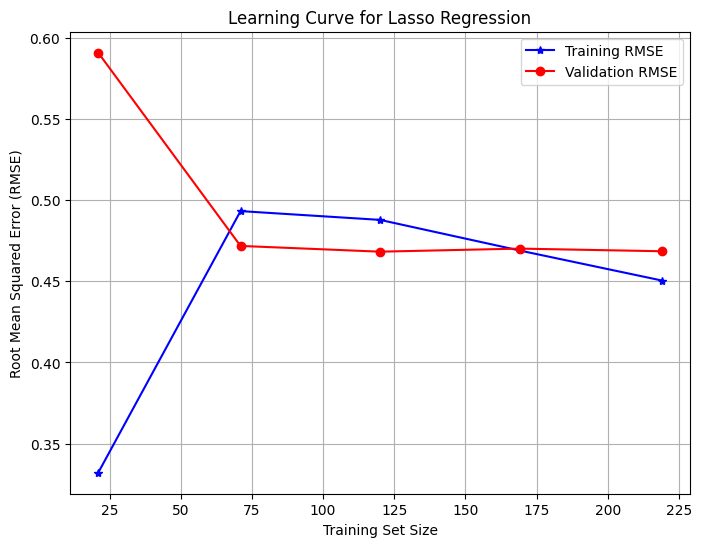

Running GridSearchCV for Principal Component Regression (PCR)...
Principal Component Regression (PCR) - Best Parameters: {'pca__n_components': 6}
Principal Component Regression (PCR) - Metrics: {'MSE': 0.1674572738405417, 'RMSE': 0.40921543695288637, 'RSE': 0.4219213699981508, 'RSS': 19.759958313183922, 'R²': 0.8076704419810162}



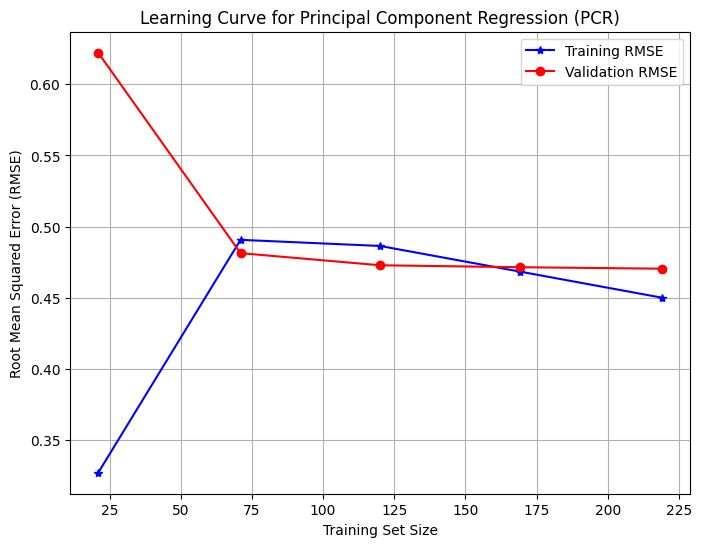

Running GridSearchCV for Regression Splines...
Regression Splines - Best Parameters: {'polynomialfeatures__degree': 2}
Regression Splines - Metrics: {'MSE': 0.130223066332282, 'RMSE': 0.36086433230825404, 'RSE': 0.37206898792651366, 'RSS': 15.366321827209278, 'R²': 0.8504350141552287}



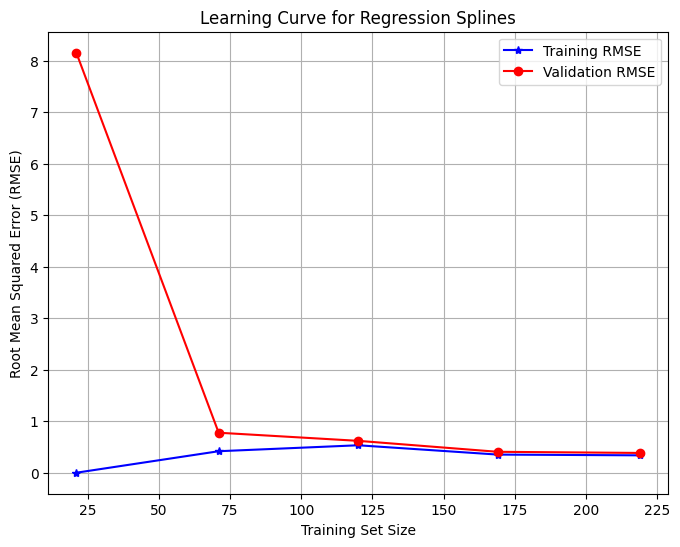

Running GridSearchCV for Regression Tree...
Regression Tree - Best Parameters: {'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 20}
Regression Tree - Metrics: {'MSE': 0.14331137557285262, 'RMSE': 0.37856488951413947, 'RSE': 0.39031913851136957, 'RSS': 16.910742317596608, 'R²': 0.8354027096531755}



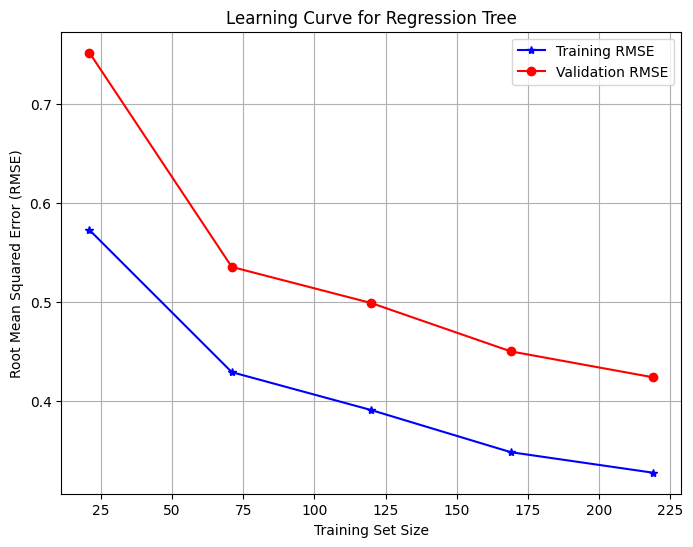

Running GridSearchCV for Support Vector Regression (SVR)...
Support Vector Regression (SVR) - Best Parameters: {'svr__C': 1, 'svr__epsilon': 0.1}
Support Vector Regression (SVR) - Metrics: {'MSE': 0.10443102652831039, 'RMSE': 0.3231578972086407, 'RSE': 0.33319178702363844, 'RSS': 12.322861130340627, 'R²': 0.880057923343572}



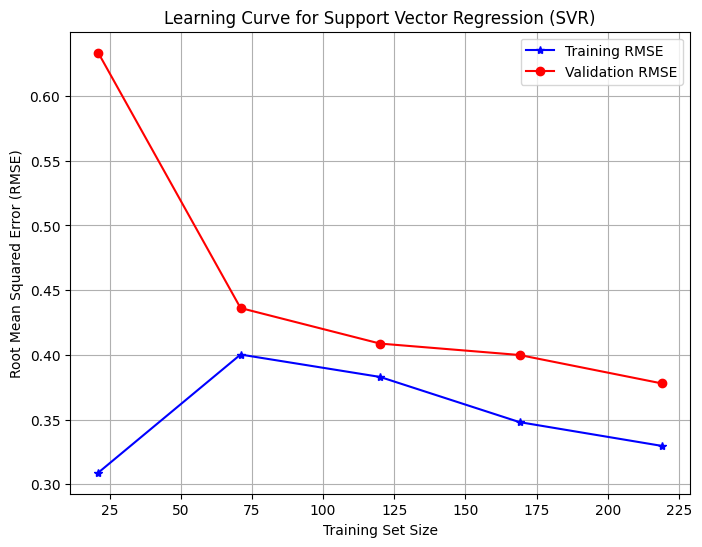


Model Performance Metrics:
                                           MSE      RMSE       RSE        RSS  \
Ridge Regression                      0.168361  0.410318  0.423058  19.866587   
Lasso Regression                      0.165972  0.407396  0.420046  19.584672   
Principal Component Regression (PCR)  0.167457  0.409215  0.421921  19.759958   
Regression Splines                    0.130223  0.360864  0.372069  15.366322   
Regression Tree                       0.143311  0.378565  0.390319  16.910742   
Support Vector Regression (SVR)       0.104431  0.323158  0.333192  12.322861   

                                            R²  
Ridge Regression                      0.806633  
Lasso Regression                      0.809377  
Principal Component Regression (PCR)  0.807670  
Regression Splines                    0.850435  
Regression Tree                       0.835403  
Support Vector Regression (SVR)       0.880058  

Best Parameters for Each Model:
Ridge Regression: {'ridge__a

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

X = df.drop(columns=['mpg'])
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

param_grids = {
    'Ridge Regression': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
    'Principal Component Regression (PCR)': {'pca__n_components': [1, 2, 3, 4, X_train_scaled.shape[1]]},
    'Regression Splines': {'polynomialfeatures__degree': [2, 3, 4]},
    'Regression Tree': {
        'decisiontreeregressor__max_depth': [3, 4, 5],
        'decisiontreeregressor__min_samples_split': [10, 15, 20],
        'decisiontreeregressor__min_samples_leaf': [4, 8, 10]
    },
    'Support Vector Regression (SVR)': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1]}
}

def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'RSE': rse, 'RSS': rss, 'R²': r2}

#function for plotting learning curves
def plot_learning_curve(model, X, y, model_name, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_rmse, label="Training RMSE", marker='*', color='blue')
    plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker='o', color='red')
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.grid()
    plt.show()
results = {}
best_parameters = {}
# Iterate over each model and perform GridSearchCV
for model_name, grid_params in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")
    if model_name == 'Principal Component Regression (PCR)':
        model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    elif model_name == 'Regression Splines':
        model = make_pipeline(PolynomialFeatures(), LinearRegression())
    elif model_name == 'Ridge Regression':
        model = make_pipeline(StandardScaler(), Ridge(max_iter=5000))
    elif model_name == 'Lasso Regression':
        model = make_pipeline(StandardScaler(), Lasso(max_iter=5000))
    elif model_name == 'Regression Tree':
        model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
    elif model_name == 'Support Vector Regression (SVR)':
        model = make_pipeline(StandardScaler(), SVR())

    grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_parameters[model_name] = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    #performance metrics
    metrics = calculate_metrics(y_test, y_pred, X_test_scaled.shape[1])
    results[model_name] = metrics

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Metrics: {metrics}\n")

    plot_learning_curve(best_model, X_train_scaled, y_train, model_name)

results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

#parameters for each model
print("\nBest Parameters for Each Model:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")
